In [3]:
from sklearn.cluster import KMeans

In [4]:
import pandas as pd

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from matplotlib import pyplot as plt

In [110]:
#LOADING THE DATASET
df=pd.read_csv(r"C:\Users\91705\Documents\Eastcoast_income_dataset.csv")

In [111]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'INCOME')

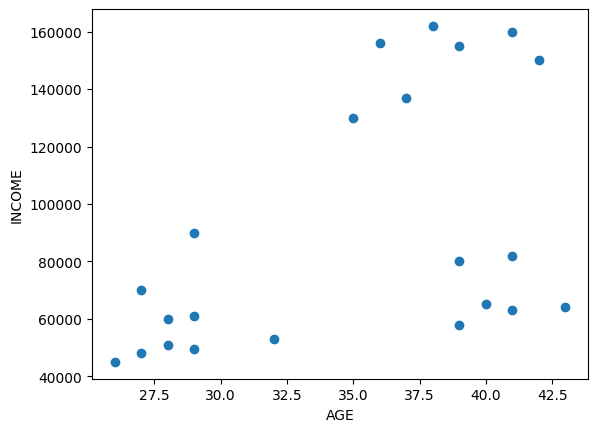

In [112]:
# VISUALIZING THE DATASET
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('AGE')
plt.ylabel('INCOME')

In [113]:
# OBJECT CREATOIN
kmeans_model = KMeans(n_clusters=3)

In [114]:
#training the model and predict
y_predict = kmeans_model.fit_predict(df[['Age','Income($)']])

C:\Users\91705\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
# display the prediction/clusters
y_predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [117]:
#make an attrubute namly cluster in a dataset and assign each row present in a dataset a cluster name
df['cluster'] = y_predict

In [118]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [119]:
#showing the centroids of alredy calculated clusters
kmeans_model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [120]:
# seperating clusters from the dataset
dataset1 = df[df.cluster==0] 
dataset2 = df[df.cluster==1]
dataset3 = df[df.cluster==2]

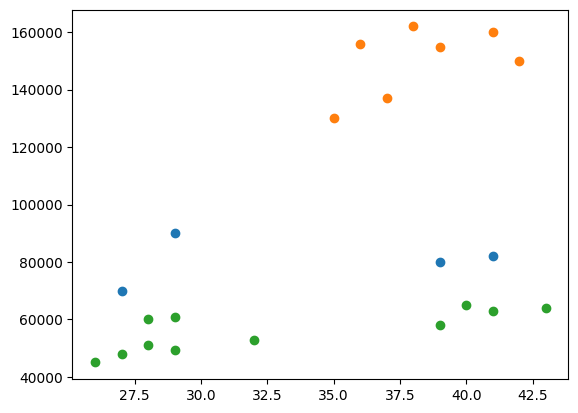

In [121]:
# visualization of clusters
plt.scatter(dataset1.Age,dataset1[['Income($)']])
plt.scatter(dataset2.Age,dataset2[['Income($)']])
plt.scatter(dataset3.Age,dataset3[['Income($)']])

In [95]:
# ACCORDING TO ABOVE SHOWEN VISULAIZATION IT IS LOOKING THAT THE CLUTERS HAVE NOT BEEN MADE WITH GOOD CORRECTly SO WE NEED FURTHER COMPUTATIONS TO PREDICT WITH GOOD ACCURACY 

In [122]:





#min max scaler used to normalize values between 0 and 1
#create scaler object
scaler = MinMaxScaler()
#NORMALIZING income column
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
#NORMALIZING age column
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [157]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [124]:
#again traning the kmeans algorithm for better accuracy
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(df[['Age','Income($)']])

C:\Users\91705\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [125]:
y_predicted


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [126]:
df['cluster'] = y_predicted

In [156]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [128]:
kmeans.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [131]:
#SEPERATING CLUSTERS
dataset1 = df[df.cluster==0]
dataset2 = df[df.cluster==1]
dataset3 = df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


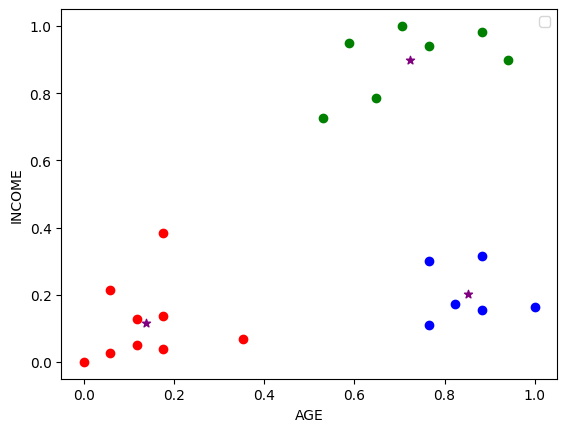

In [134]:
#visualizing clusters
plt.scatter(dataset1.Age,dataset1[['Income($)']],color='red')
plt.scatter(dataset2.Age,dataset2[['Income($)']],color='blue')
plt.scatter(dataset3.Age,dataset3[['Income($)']],color='green')
plt.xlabel('AGE')
plt.ylabel('INCOME')
plt.legend()
#displaying clusters centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [152]:
#calculating clusters or k with albow method

#within cluster sum of square (WCSS)
sse=[] # sum of square error array
krange = range(1,10)
for k in krange:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Age','Income($)']])
    sse.append(kmeans.inertia_)

C:\Users\91705\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91705\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91705\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91705\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [153]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.27669362763002786,
 0.22443334487241418,
 0.17299621932455467,
 0.1397684499538816,
 0.10383752586603562]

Text(0, 0.5, 'SUM OF SQUARED ERROR')

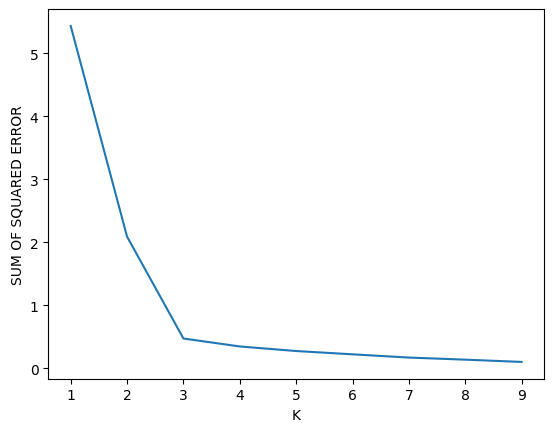

In [155]:
#plotting WCSS to see the elbow 
plt.plot(krange,sse)
plt.xlabel('K')
plt.ylabel('SUM OF SQUARED ERROR')